# **ARM**

## Loading and Preparing the dataset

In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

file_path = "final_cleaned_oscars.csv"
df = pd.read_csv(file_path)

print(df.head())

   Year                  Category  Film    Film_ID  \
0  1972       Best Cinematography  1776  tt0068156   
1  2019       Best Cinematography  1917  tt8579674   
2  2019             Best Director  1917  tt8579674   
3  2019              Best Picture  1917  tt8579674   
4  2019  Best Original Screenplay  1917  tt8579674   

                                             Nominee  Winner  TMDb_ID  \
0                               Harry Stradling, Jr.   False    14902   
1                                      Roger Deakins    True   530915   
2                                         Sam Mendes   False   530915   
3  Sam Mendes, Pippa Harris, Jayne-Ann Tenggren a...   False   530915   
4       Written by Sam Mendes & Krysty Wilson-Cairns   False   530915   

   Popularity  Vote_Count  Vote_Average                   Genres  \
0       6.822          75           6.8  Drama, History, Musical   
1      45.996       12542           8.0       Action, Drama, War   
2      45.996       12542       

## Converting Data into Transaction Format

In [3]:
df_transactions = df.groupby("Film_ID")["Category"].apply(list).reset_index()
transactions = df_transactions["Category"].tolist()

print(transactions[:5])

[['Best Cinematography'], ['Best Cinematography'], ['Best Actor'], ['Best Actress', 'Best Director', 'Best Picture'], ['Best Actress']]


## Encoding Transaction Data

In [4]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

print(df_encoded.head())
df_encoded.to_csv('ARM_encoded.csv', index=False)

   Best Actor  Best Actress  Best Adapted Screenplay  Best Cinematography  \
0       False         False                    False                 True   
1       False         False                    False                 True   
2        True         False                    False                False   
3       False          True                    False                False   
4       False          True                    False                False   

   Best Director  Best Original Screenplay  Best Picture  \
0          False                     False         False   
1          False                     False         False   
2          False                     False         False   
3           True                     False          True   
4          False                     False         False   

   Best Supporting Actor  Best Supporting Actress  
0                  False                    False  
1                  False                    False  
2                  F

## Applying Apriori Algorithm

In [5]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())

    support                   itemsets
0  0.253158               (Best Actor)
1  0.260297             (Best Actress)
2  0.135640  (Best Adapted Screenplay)
3  0.349259      (Best Cinematography)
4  0.259198            (Best Director)


## Generating Association Rules

In [6]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(rules.head())
rules.to_csv('ARM_rules.csv', index=False)

                 antecedents                consequents  antecedent support  \
0  (Best Adapted Screenplay)               (Best Actor)            0.135640   
1               (Best Actor)  (Best Adapted Screenplay)            0.253158   
2            (Best Director)               (Best Actor)            0.259198   
3               (Best Actor)            (Best Director)            0.253158   
4               (Best Actor)             (Best Picture)            0.253158   

   consequent support   support  confidence      lift  representativity  \
0            0.253158  0.046129    0.340081  1.343357               1.0   
1            0.135640  0.046129    0.182213  1.343357               1.0   
2            0.253158  0.112576    0.434322  1.715619               1.0   
3            0.259198  0.112576    0.444685  1.715619               1.0   
4            0.314662  0.132894    0.524946  1.668283               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  


 ## Top 15 Rules by Support

In [7]:
top_15_support = rules.nlargest(15, "support")
print("Top 15 Rules by Support:\n", top_15_support)

top_15_support.to_csv('top_15_support.csv', index=False)

Top 15 Rules by Support:
                        antecedents              consequents  \
30                 (Best Director)           (Best Picture)   
31                  (Best Picture)          (Best Director)   
26                  (Best Picture)    (Best Cinematography)   
27           (Best Cinematography)           (Best Picture)   
4                     (Best Actor)           (Best Picture)   
5                   (Best Picture)             (Best Actor)   
24                 (Best Director)    (Best Cinematography)   
25           (Best Cinematography)          (Best Director)   
2                  (Best Director)             (Best Actor)   
3                     (Best Actor)          (Best Director)   
40         (Best Supporting Actor)           (Best Picture)   
41                  (Best Picture)  (Best Supporting Actor)   
134    (Best Director, Best Actor)           (Best Picture)   
135  (Best Director, Best Picture)             (Best Actor)   
136     (Best Actor, Best Pic

## Top 15 Rules by Confidence

In [8]:
top_15_confidence = rules.nlargest(15, "confidence")
print("Top 15 Rules by Confidence:\n", top_15_confidence)

top_15_confidence.to_csv('top_15_confidence.csv', index=False)

Top 15 Rules by Confidence:
                                             antecedents      consequents  \
1170  (Best Director, Best Adapted Screenplay, Best ...   (Best Picture)   
1470  (Best Director, Best Adapted Screenplay, Best ...   (Best Picture)   
1500  (Best Director, Best Adapted Screenplay, Best ...   (Best Picture)   
1530  (Best Director, Best Supporting Actress, Best ...   (Best Picture)   
1770  (Best Supporting Actress, Best Supporting Acto...  (Best Director)   
1799  (Best Supporting Actress, Best Supporting Acto...  (Best Director)   
1920  (Best Director, Best Adapted Screenplay, Best ...   (Best Picture)   
1950  (Best Director, Best Supporting Actress, Best ...   (Best Picture)   
2070  (Best Picture, Best Supporting Actress, Best A...  (Best Director)   
1184  (Best Director, Best Supporting Actress, Best ...   (Best Picture)   
2039  (Best Supporting Actress, Best Supporting Acto...  (Best Director)   
572   (Best Adapted Screenplay, Best Actor, Best Cin...   (

## Top 15 Rules by Lift

In [9]:
top_15_lift = rules.nlargest(15, "lift")
print("Top 15 Rules by Lift:\n", top_15_lift)

top_15_lift.to_csv('top_15_lift.csv', index=False)

Top 15 Rules by Lift:
                                             antecedents  \
2095  (Best Supporting Actor, Best Actor, Best Picture)   
2098  (Best Director, Best Supporting Actress, Best ...   
1777  (Best Supporting Actress, Best Original Screen...   
1784             (Best Director, Best Supporting Actor)   
2044  (Best Supporting Actress, Best Original Screen...   
2057             (Best Director, Best Supporting Actor)   
2092  (Best Supporting Actress, Best Cinematography,...   
2101  (Best Director, Best Actor, Best Supporting Ac...   
2115             (Best Director, Best Supporting Actor)   
2078  (Best Supporting Actress, Best Cinematography,...   
2112           (Best Director, Best Supporting Actress)   
2081  (Best Supporting Actor, Best Cinematography, B...   
2093  (Best Supporting Actress, Best Supporting Acto...   
2100   (Best Director, Best Actor, Best Cinematography)   
1780  (Best Supporting Actor, Best Original Screenpl...   

                                

## Visualizing Association Rules as a Network Graph

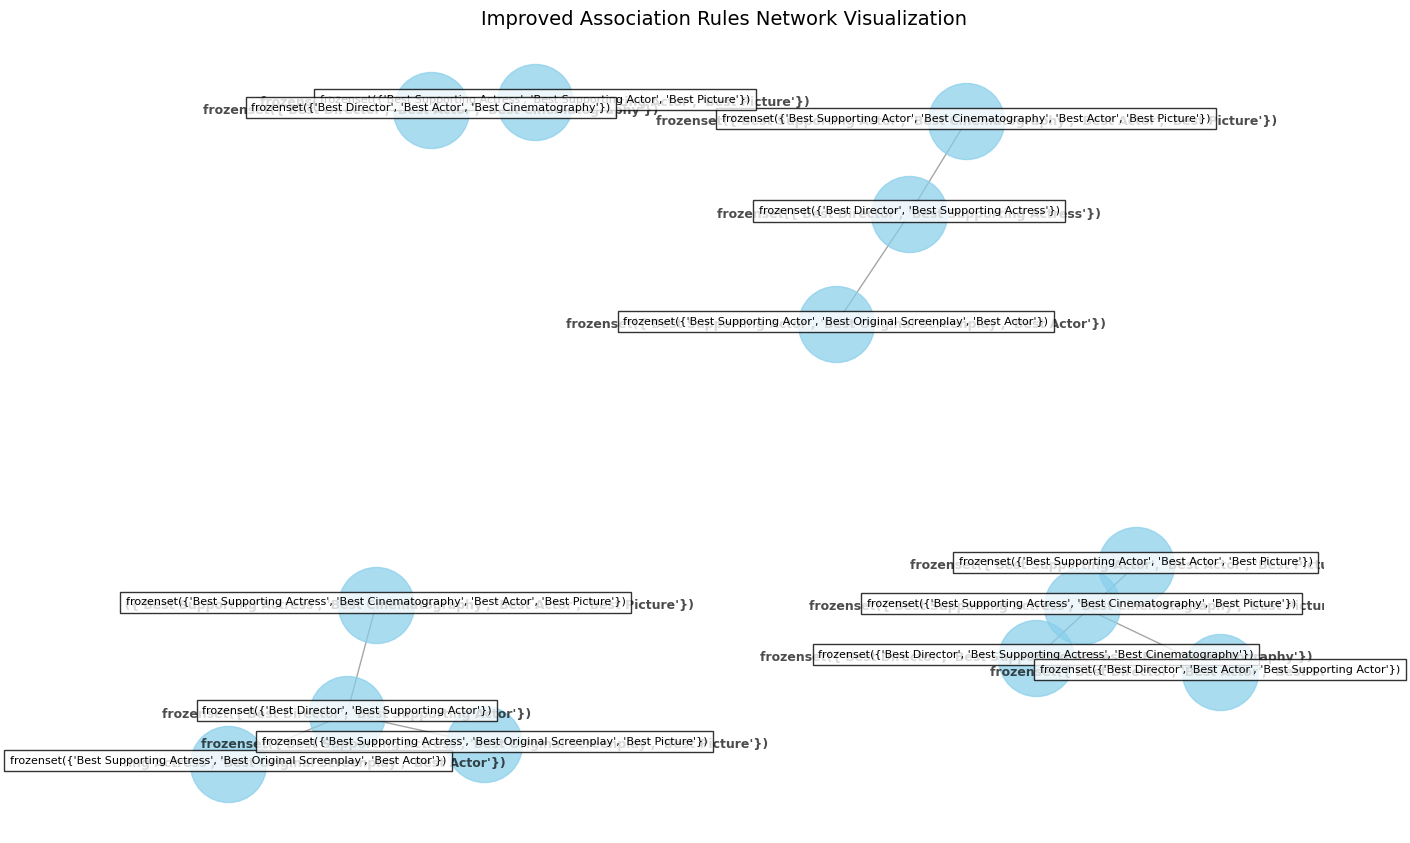

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(rules.nlargest(15, 'lift'), 'antecedents', 'consequents')

plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G, k=0.5)

nx.draw(
    G, pos, with_labels=True, node_color='skyblue', edge_color='gray',
    font_size=9, font_weight='bold', node_size=3000, alpha=0.7
)

for node, (x, y) in pos.items():
    plt.text(x, y, s=node, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'),
             horizontalalignment='center', fontsize=8)

plt.title("Improved Association Rules Network Visualization", fontsize=14)
plt.show()